### 연습문제 10.3.1

1. 

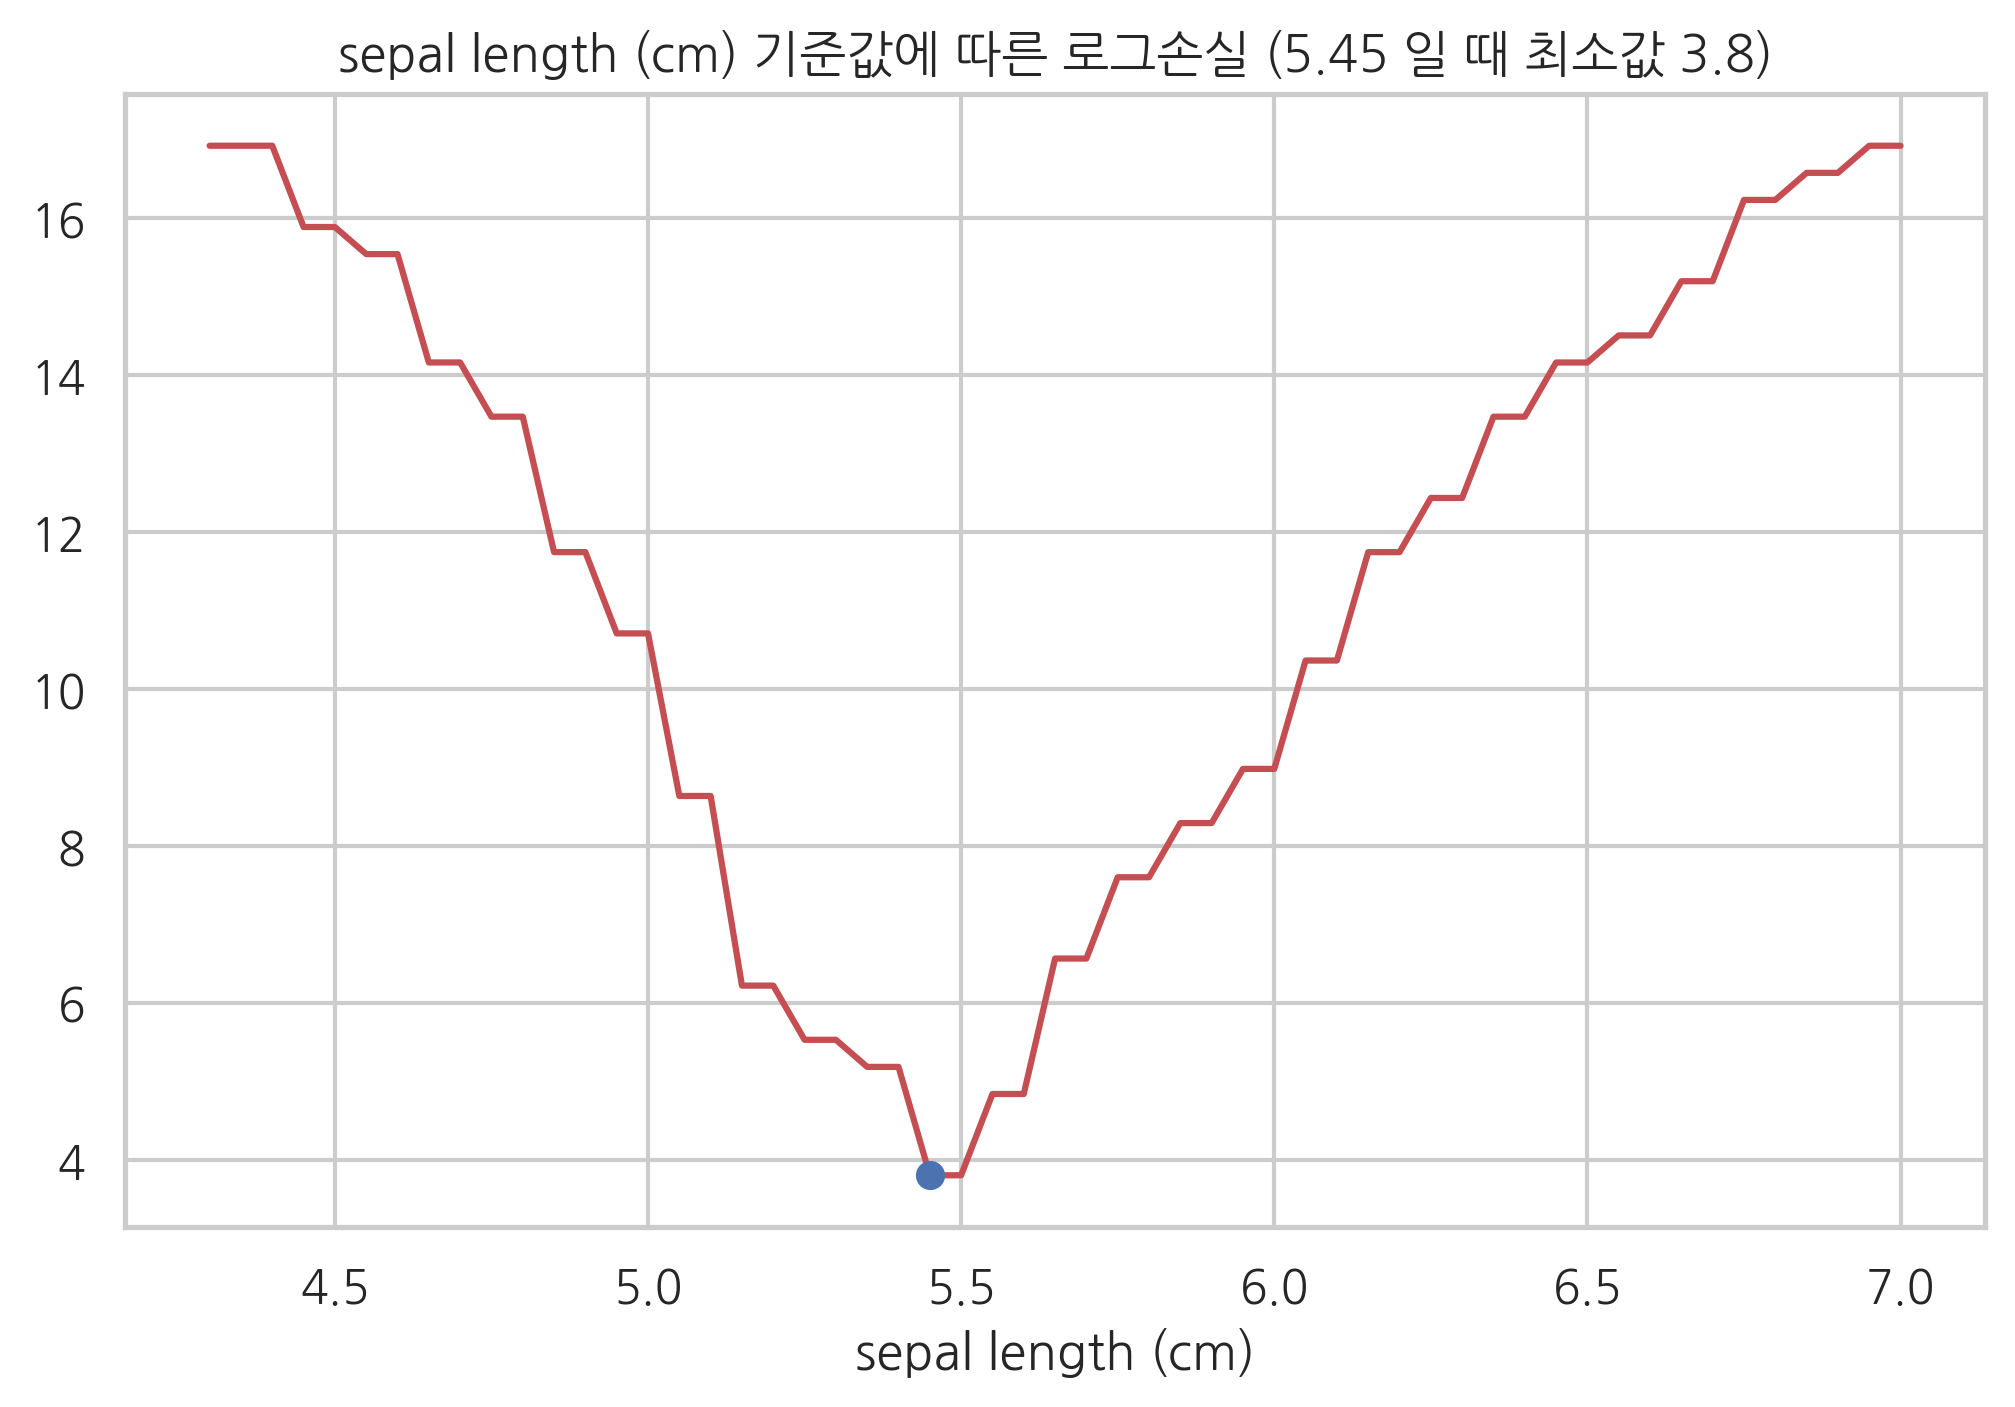

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
idx = np.in1d(iris.target, [0, 1])
X = iris.data[idx, :]
y = iris.target[idx]
df = pd.DataFrame(X, columns = iris.feature_names)
df['y'] = iris.target[idx]

def calc_logloss(col, threshold, reverse = False):
    if reverse:
        df['y_hat'] = (df[col] < threshold).astype(int)
    else:
        df['y_hat'] = (df[col] > threshold).astype(int)
    return log_loss(df['y'], df['y_hat'])

def plot_min_logloss(col, reverse = False):
    th_min = df[col].min()
    th_max = df[col].max()
    th_range = np.arange(th_min, th_max+0.05, 0.05)
    
    loglosses = []
    for th in th_range:
        loglosses.append(calc_logloss(col, th, reverse))
        
    id_min = np.argmin(loglosses)
    th_min = th_range[id_min]
    ll_min = np.min(loglosses)
    plt.plot(th_range, loglosses, 'r-')
    plt.plot(th_min, ll_min, 'bo')
    title = "{} 기준값에 따른 로그손실 ({:.3} 일 때 최소값 {:.3})".format(col, th_min, ll_min)
    plt.title(title)
    plt.xlabel(col)
    plt.show()
plot_min_logloss('sepal length (cm)')

In [3]:
from sklearn.metrics import log_loss
log_loss(df['y'], df['y_hat'])

3.799305383311686

2.

5.45

3.

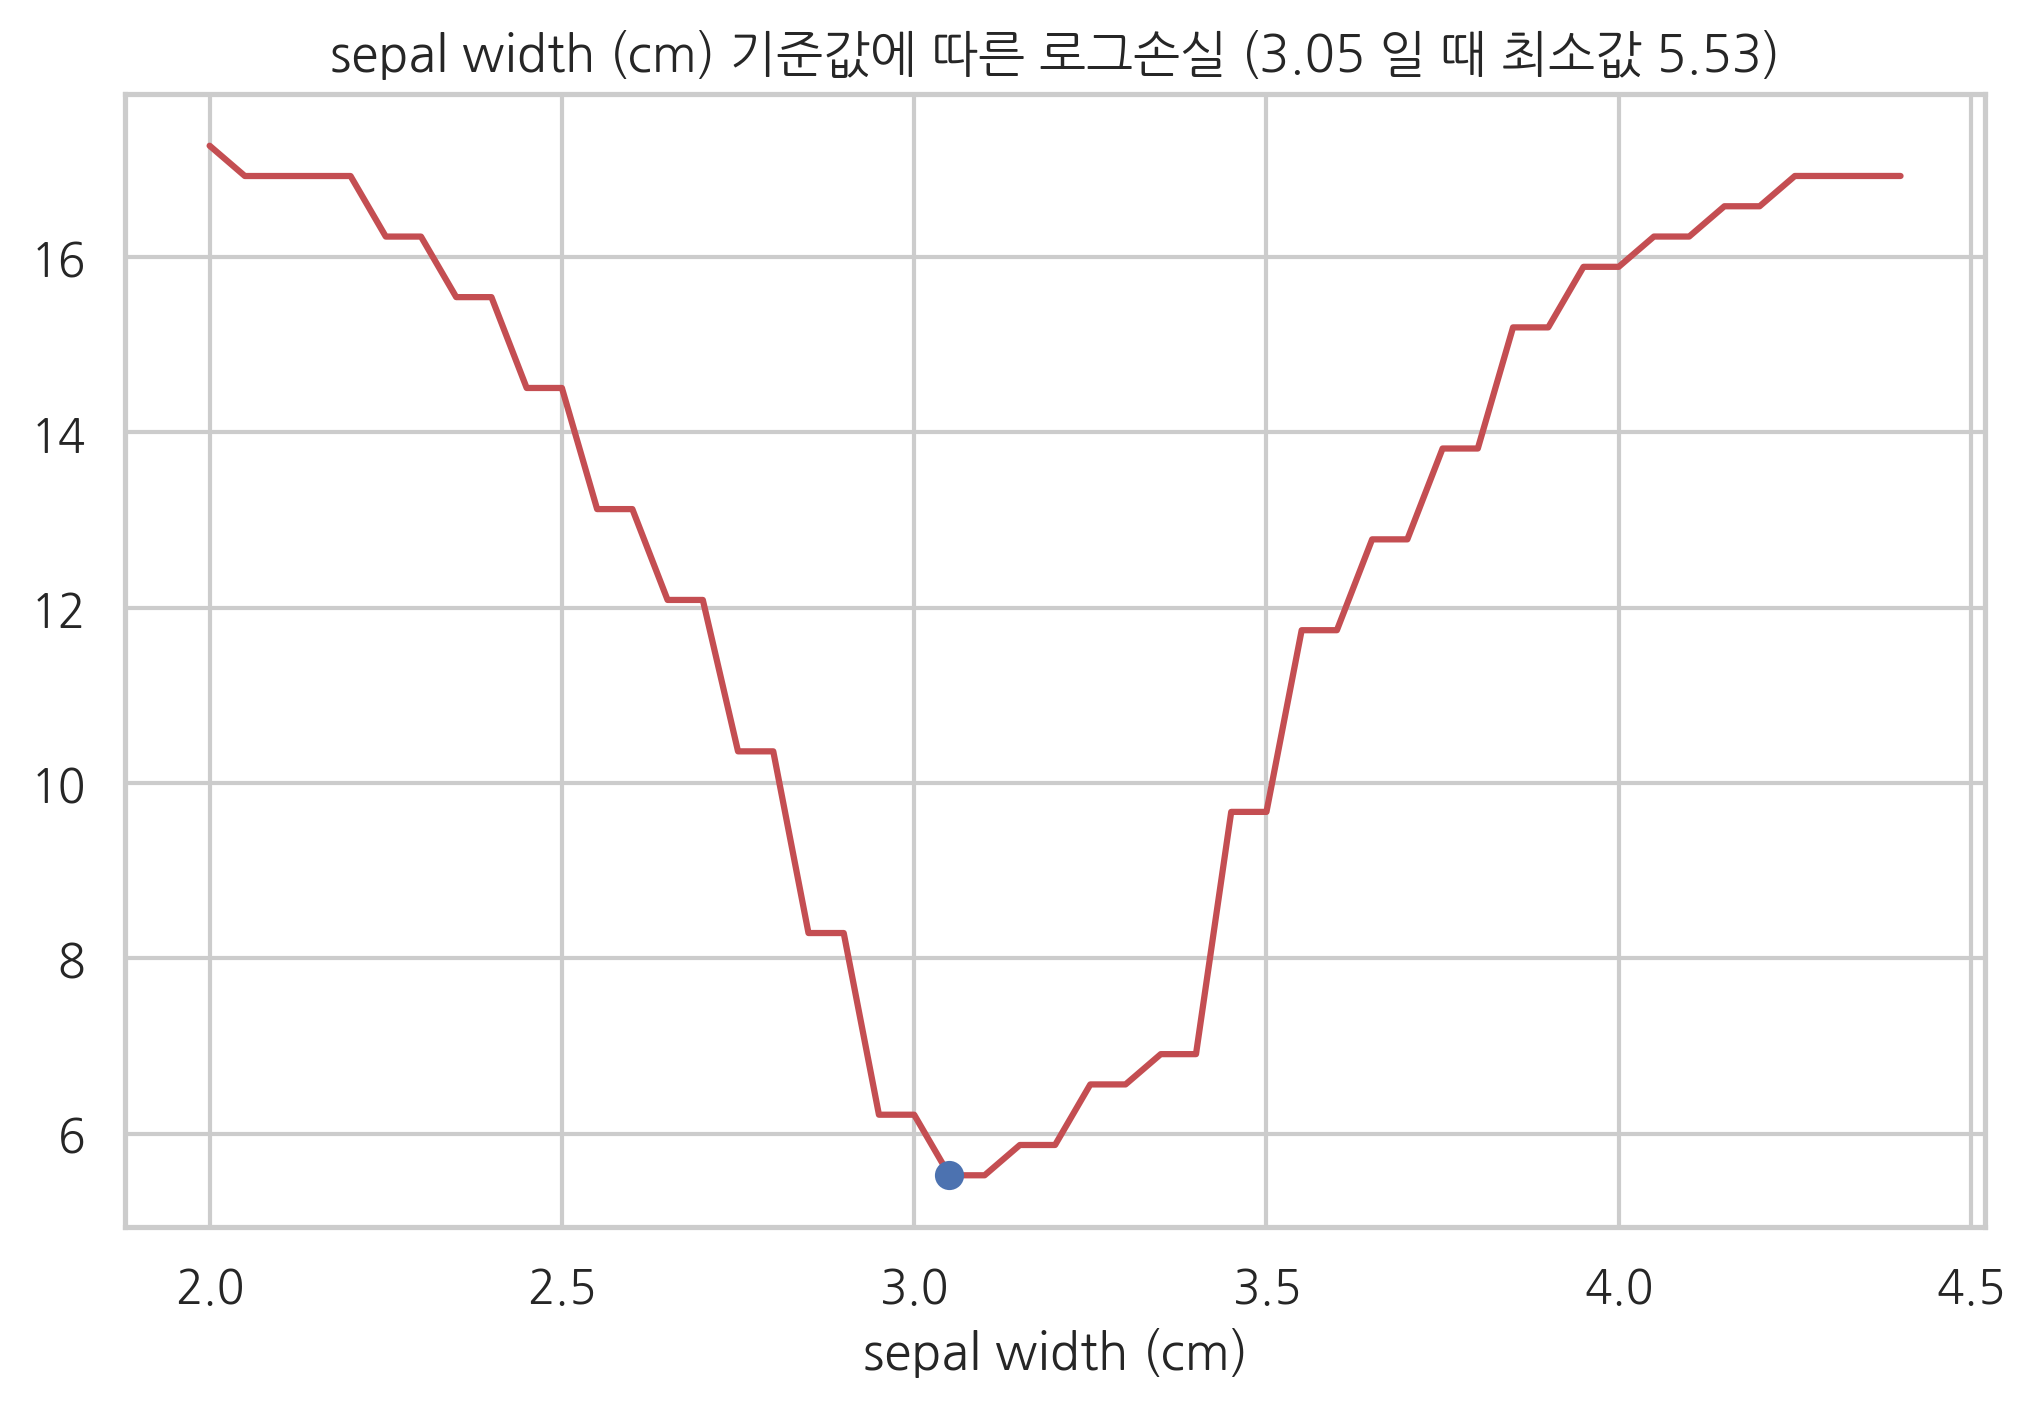

In [7]:
plot_min_logloss('sepal width (cm)', reverse = True)

4.25

4.

꽃받침 길이

### 연습문제 10.3.2

1.

In [8]:
sp.stats.entropy([1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/64, 1/64], [1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8, 1/8], base = 2)

1.0

2.

In [10]:
N = 200
p = [1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/64, 1/64]
doc0 = list(''.join([int(N*p[i]) * c for i,c in enumerate('ABCDEFGH')]))
np.random.shuffle(doc0)
doc = ''.join(doc0)

In [14]:
vl_encoder = {'A': '0', 'B':'10', 'C':'110','D':'1110','E':'11110','F':'11100','G':'11000','H':'10000'}
vl_encoded_doc = ''.join([vl_encoder[c] for c in doc])
len(vl_encoded_doc) / len(doc)

1.9246231155778895

In [13]:
encoder = {'A': '000', 'B':'001', 'C':'010','D':'011','E':'100','F':'101','G':'110','H':'111'}
encoded_doc = ''.join([encoder[c] for c in doc])
len(encoded_doc) / len(doc)

3.0